# Descripción del proyecto : Planes de celulares 

Trabajamos para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Para resolver este problema, realizaremos lo siguientes análisis: 
- 1. Abriremos el archivo de datos y estudiaremos la información general 
- 2. Prepararemos los datos a traves de la contatación de valores ausentes, duplicados.  
- 3. Analiza los datos y agruparemos para tener una mejor visualización de los datos
- 4. Crearemos un perfil de usuario para cada región 
- 5. Probaremos las hipótesis que nos propongamos según el análisis que nos arrojen los  datos
- 6. Conclusión general

In [1]:
#importamos librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("/datasets/games.csv")

# Análisis Datasets

In [3]:
#analizamos el dataset
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#vemos la información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Remplazar nombre de las columnas

In [6]:
#Reemplaza los nombres de las columnas (ponlos en minúsculas). 
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# Convertir los datos a los tipos necesarios

In [7]:
#Convierte los datos en los tipos necesarios.
#Para esto, primero vemos el tipo de datos que tienen los datos
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [8]:
#Para convertir los años a número enteros,  se requiere que 'year_of_release' no tenga valores ausentes para poder hacer el cambio de tipo.
#Primero haremos la imputaciñin de los valores ausentes y después el cambio a int
#Para esto extraeremos el año del nombre del juego tomando en consideración que el release se da un año antes por motivos de marketing.
pivot_year = data.pivot_table(index='name', values='year_of_release', aggfunc='median')
def fill_year(row):
    year = row['year_of_release']
    game_name = row['name']
    try:
        if pd.isna(year):
            return pivot_year['year_of_release'][game_name]
        return year
    except:
        return data['year_of_release'].median()
data['year_of_release'] = data.apply(fill_year, axis=1)


In [9]:
#Y ahora podemos convertir los datos a int
data["year_of_release"] = data["year_of_release"].astype("int16")

In [10]:
#Probaremos lo anterior con info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int16(1), object(5)
memory usage: 1.3+ MB


In [11]:
#Aquí vemos que la variable "user_score", contiene el valor tbd, que nos limita a que esta variable se convierta en float64
data["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
#queremos analizar cuales con los datos que cuentan con el valor tbd
data.loc[data["user_score"] == "tbd"].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2007,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


In [13]:
#lo que haremos será vovler nulos todos los valores tbd para luego, pasar estos datos a numéricos, y tratarlos como nulos
#en esta ocasión consideraremos los las calificaciones que aún no están determinadas, como valores vacios
data.loc[data["user_score"] == "tbd", "user_score"] = None

In [14]:
#por lo tanto, ahora pasamos esta variable a float
data["user_score"] = data["user_score"].astype("float64")
#comprobamos lo anterior
data.dtypes

name                object
platform            object
year_of_release      int16
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

# Valores ausentes

In [15]:
#Analizamos que el data set cuenta con valores ausentes 
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Puede ser que tengamos valores ausentes en la variable "name", por un error de captura. Ya que estos con solo 2, no los remplazaremos. 


In [16]:
# Veamos la tabla filtrada con valores ausentes de la variable name

data[data["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Como vemos en los datos anteriores, los mismos valores ausentes que se dan en la columna name, serán los mismos que tendremos para genero. 
De esta manera, eliminaremos estos valores ausentes. También, ya que solo son 2 valores  de todo el data set. 


In [17]:
data.drop([659, 14244], axis=0, inplace=True)

In [18]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [18]:
#probamos lo anterior
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [19]:
#Para ciertas plataformas la puntación de los criticos, como de los usuarios, se da en base a la plataforma

In [20]:
#Para rellenar critic score o user_score nos podriamos fijar en las ventas totales 
#para formar grupos de ventas totales
data["total_sales"] = data["na_sales"]+ data["eu_sales"]+ data["jp_sales"] + data["other_sales"]
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [21]:
#ahora formaremos grupos de las ventas totales 
data["total_sales_by_group"] = pd.qcut(data["total_sales"], q=5)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_by_group
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,"(0.6, 82.54]"
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,"(0.6, 82.54]"
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,"(0.6, 82.54]"
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,"(0.6, 82.54]"
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,"(0.6, 82.54]"


In [22]:
#Con lo anterior, vemos que se formaton 5 grupos
data["total_sales_by_group"].unique()

[(0.6, 82.54], (0.25, 0.6], (0.11, 0.25], (0.05, 0.11], (-0.001, 0.05]]
Categories (5, interval[float64]): [(-0.001, 0.05] < (0.05, 0.11] < (0.11, 0.25] < (0.25, 0.6] < (0.6, 82.54]]

In [23]:
data.pivot_table(index='total_sales_by_group', values='critic_score', aggfunc='median')

,critic_score
total_sales_by_group,
"(-0.001, 0.05]",66.0
"(0.05, 0.11]",65.0
"(0.11, 0.25]",67.0
"(0.25, 0.6]",71.0
"(0.6, 82.54]",79.0


In [24]:
data["total_sales"].corr(data["critic_score"])

0.24550668717736324

Mediante la correlación entre las variables ventas totales y el puntaje que le dan los crtíticos, vemos que la conexión no es muy fuerte. Es decir, no siempre que el puntaje es alto, lo va a ser también las ventas. 
Por lo tanto, agregaremos a este análisis la variable "plataforma para profundizar

In [25]:
data.pivot_table(index=["total_sales_by_group", 'platform'], values='critic_score', aggfunc='median')

critic_score
total_sales_by_group platform              
(-0.001, 0.05]       3DS               64.0
                     DC                83.0
                     DS                60.0
                     GBA               68.0
                     GC                62.0
...                                     ...
(0.6, 82.54]         Wii               72.0
                     WiiU              81.0
                     X360              81.0
                     XB                83.0
                     XOne              82.0

[85 rows x 1 columns]

In [27]:
pivot_table_critic_score = data.pivot_table(index=["total_sales_by_group", 'platform'], values='critic_score', aggfunc='median')
def fill_critic_score(row):
    critics = row['critic_score']
    total_sales = row["total_sales_by_group"]
    platform_type = row['platform']
    try:
        if pd.isna(critics):
            return pivot_table_critic_score['critic_score'][total_sales , platform_type]
        return critics
    except:
        return data['critic_score'].median()
data['critic_score'] = data.apply(fill_critic_score, axis=1)

In [26]:
#Comprobamos lo anterior
data.isna().sum()

name                       0
platform                   0
year_of_release            0
genre                      0
na_sales                   0
eu_sales                   0
jp_sales                   0
other_sales                0
critic_score            8576
user_score              9123
rating                  6764
total_sales                0
total_sales_by_group       0
dtype: int64

Ahora reemplazaremos los valores de la variable user_score, con la de critic_score. Esto más bien, por que usualmente, cuando se trata de rankear algun producto o servicio por parte del usuario, su conducta está relacionada con la puntuación entregada por los críticos


In [27]:
#Primero para ver si estamos en lo correcto, vemos la correlación 
data["user_score"].corr(data["critic_score"])

0.5808778320767237

Aquí podemos ver que cuenta con una fuerte vinculación, aun que podría ser mayor. Esto quiere decir, que al aumento de la puntuación de los criticos, aumenta la puntuación de los usuarios, aun que no siempre. 

In [28]:
#reemplazamos los valores de user_score, con respecto a los de critic_score
pivot_table_cuser_score = data.pivot_table(index="critic_score", values='user_score', aggfunc='median')
def fill_user_score(row):
    users = row['user_score']
    critics_score = row['critic_score']
    try:
        if pd.isna(users):
            return pivot_table_cuser_score['user_score'][critic_score]
        return users
    except:
        return data['user_score'].median()
data['user_score'] = data.apply(fill_user_score, axis=1)

In [29]:
#Comprobamos lo anterior
data.isna().sum()

name                       0
platform                   0
year_of_release            0
genre                      0
na_sales                   0
eu_sales                   0
jp_sales                   0
other_sales                0
critic_score            8576
user_score                 0
rating                  6764
total_sales                0
total_sales_by_group       0
dtype: int64

In [30]:
#evaluamos la columna raiting (clasificación)
data["rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [31]:
data[data["rating"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_by_group
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN,40.24,"(0.6, 82.54]"
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,NaN,31.38,"(0.6, 82.54]"
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,7.5,NaN,30.26,"(0.6, 82.54]"
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,7.5,NaN,28.31,"(0.6, 82.54]"
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,7.5,NaN,24.67,"(0.6, 82.54]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,7.5,NaN,0.01,"(-0.001, 0.05]"
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,7.5,NaN,0.01,"(-0.001, 0.05]"
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,7.5,NaN,0.01,"(-0.001, 0.05]"
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,7.5,NaN,0.01,"(-0.001, 0.05]"


La razón de que falten datos en la variable "rating" se debe a un error de captura 

In [32]:
data.groupby("rating")["name"].count()

rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: name, dtype: int64

In [33]:
data.loc[data["name"] == "Super Mario Bros."].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_by_group
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN,40.24,"(0.6, 82.54]"
201,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,7.5,NaN,5.07,"(0.6, 82.54]"


In [34]:
#vamos la relación entre el género y el rating
data.loc[data["genre"] == "Platform"].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_by_group
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN,40.24,"(0.6, 82.54]"
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,"(0.6, 82.54]"
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,"(0.6, 82.54]"
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,7.5,NaN,20.62,"(0.6, 82.54]"
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,7.5,NaN,18.14,"(0.6, 82.54]"


In [35]:
data.loc[data["genre"] == "Role-Playing"].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_by_group
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,NaN,31.38,"(0.6, 82.54]"
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,7.5,NaN,23.09,"(0.6, 82.54]"
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,7.5,NaN,18.24,"(0.6, 82.54]"
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,NaN,7.5,NaN,15.84,"(0.6, 82.54]"
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,7.5,NaN,15.13,"(0.6, 82.54]"
30,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,5.89,5.04,3.12,0.59,NaN,7.5,NaN,14.64,"(0.6, 82.54]"
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,7.5,NaN,14.60,"(0.6, 82.54]"
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,7.5,NaN,11.68,"(0.6, 82.54]"
58,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,4.34,2.65,3.15,0.35,NaN,7.5,NaN,10.49,"(0.6, 82.54]"
65,Final Fantasy VII,PS,1997,Role-Playing,3.01,2.47,3.28,0.96,92.0,9.2,T,9.72,"(0.6, 82.54]"


In [36]:
data.loc[data["genre"] == "Puzzle"].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_by_group
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,7.5,NaN,30.26,"(0.6, 82.54]"
26,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E,15.28,"(0.6, 82.54]"
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.00,0.08,NaN,7.5,NaN,7.81,"(0.6, 82.54]"
157,Tetris,NES,1988,Puzzle,2.97,0.69,1.81,0.11,NaN,7.5,NaN,5.58,"(0.6, 82.54]"
172,Dr. Mario,GB,1989,Puzzle,2.18,0.96,2.00,0.20,NaN,7.5,NaN,5.34,"(0.6, 82.54]"
188,Professor Layton and the Curious Village,DS,2007,Puzzle,1.21,2.43,1.03,0.52,85.0,8.6,E,5.19,"(0.6, 82.54]"
217,Dr. Mario,NES,1990,Puzzle,2.62,0.60,1.52,0.10,NaN,7.5,NaN,4.84,"(0.6, 82.54]"
308,Professor Layton and the Diabolical Box,DS,2007,Puzzle,0.90,1.76,0.92,0.37,84.0,8.8,E10+,3.95,"(0.6, 82.54]"
415,Professor Layton and the Unwound Future,DS,2008,Puzzle,0.60,1.57,0.82,0.27,86.0,9.2,E10+,3.26,"(0.6, 82.54]"
489,Pac-Man Collection,GBA,2001,Puzzle,2.07,0.77,0.05,0.05,79.0,7.8,E,2.94,"(0.6, 82.54]"


Con las tablas anteriores, pudimos ver que la clasificación está altamente relacionado con el género. Por lo tanto, remplazaremos los valores basados en el genero

In [37]:
pd.crosstab(index=data['genre'],
            columns=data['rating'], margins=True)

rating,AO,E,E10+,EC,K-A,M,RP,T,All
genre,,,,,,,,,
Action,1,416,481,1,0,608,0,681,2188
Adventure,0,162,68,2,0,99,0,115,446
Fighting,0,8,19,0,0,49,0,362,438
Misc,0,457,167,5,1,13,0,239,882
Platform,0,358,144,0,0,3,0,64,569
Puzzle,0,289,43,0,0,0,0,10,342
Racing,0,585,96,0,0,18,1,172,872
Role-Playing,0,84,111,0,0,162,0,420,777
Shooter,0,48,58,0,0,565,0,348,1019


In [38]:
#En este caso, aputaremos los valores de rating que cuentan con mayor frecuencia de la cilumna género
def genre_group(genre):
    if genre == "Action":
        return "T"
    elif genre == "Adventure":
        return "E"
    elif genre == "Fighting":
        return "T"
    elif genre == "Misc":
        return "E"
    elif genre == "Puzzle":
        return "E"
    elif genre == "Racing":
        return "E"
    elif genre == "Role-Playing	":
        return "T"
    elif genre == "Shooter":
        return "M"
    elif genre == "Simulation":
        return "E"
    elif genre == "Sports":
        return "E"
    elif genre == "Strategy":
        return "T"
    


In [39]:
#Reemplazamos los valores ausentes
data.loc[data["rating"].isna(), "rating"] = data.loc[data["rating"].isna(),"rating" ].apply(genre_group)

# Análisis de datos


**1. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?**

In [40]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_by_group
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,"(0.6, 82.54]"
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.5,None,40.24,"(0.6, 82.54]"
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,"(0.6, 82.54]"
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,"(0.6, 82.54]"
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,None,31.38,"(0.6, 82.54]"


In [41]:
#Antes de ver cuantos juegos se lanzaron por año, comprobaremos que no contamos con valores duplicados
data.duplicated().sum()

0

In [42]:
#Para sacar el valor anterior,  

data.groupby('year_of_release')["name"].count().sort_values()

year_of_release
1980       9
1984      14
1985      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     340
2000     351
1998     379
2001     486
2016     502
2013     548
2014     581
2015     606
2012     662
2004     765
2003     784
2002     844
2005     948
2006    1019
2011    1153
2010    1269
2007    1348
2009    1430
2008    1441
Name: name, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

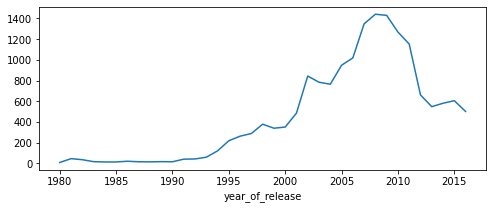

In [43]:
#Graficamos lo anterior, para comprobar su significancia.
data.groupby('year_of_release')["name"].count().plot(kind="line", figsize=(8, 3))

Aquí vemos que el año 2009 fue el año que más  lanzamientos de juegos tuvo, seguido por 2008 y en 3er lugar 2010
Sin embargo, en cuanto a la significancia de los datos podemos decir que los datos no son significativos durante los primeros periodos ( 1980 - 1994). 
Es en 1994, cuando podemos ver un añumento en el lanzamiento de juegos, a cifras de 3 dígitos. Desde este momento la muestra es mucho mayor. 
[A partir de 36 datos es una muestra estadísticamente significativa] 

**2.Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**

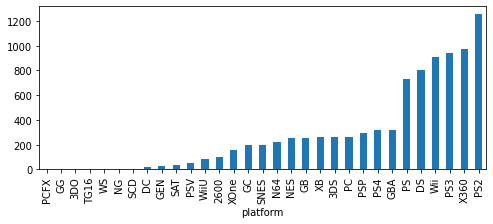

In [44]:
#Elige las plataformas con las mayores ventas totales 
data.groupby("platform")["total_sales"].sum().sort_values().plot(kind="bar", figsize=(8, 3))
plt.show()

In [45]:
data.groupby(["platform", 'year_of_release'])["total_sales"].sum().sort_values()

platform  year_of_release
DC        2007                 0.02
DS        1985                 0.02
3DO       1994                 0.02
3DS       2000                 0.02
PC        1988                 0.03
                              ...  
Wii       2008               177.68
PS2       2003               193.05
Wii       2009               206.97
PS2       2002               208.36
          2004               212.76
Name: total_sales, Length: 249, dtype: float64

Según el gráfico de barras anterior, podemos elegir a las plataformas con mayores ventas: 
1. PS2
2. X360
3. Wii
4. PS3
5. DS
6. PS


In [46]:
#Estas 6 plataformas las llevaremos a una lista
most_popular_platform = data.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head(6).index.tolist()
most_popular_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

<AxesSubplot:xlabel='year_of_release'>

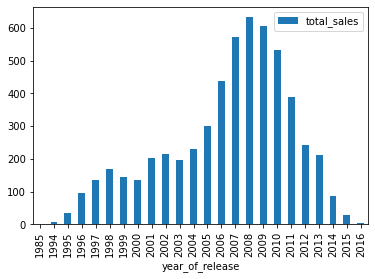

In [47]:
#Ventas totales de las 6 plataformas más vendidas por año
data[data["platform"].isin(most_popular_platform)].pivot_table(index="year_of_release", values="total_sales", aggfunc="sum"). plot(kind="bar")

Aquí podemos ver que las mayores ventas se dan durante los años 2008 y 2009, lo que está alineado con el número de lanzamiento de juegos por año.

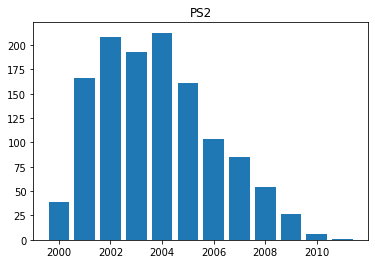

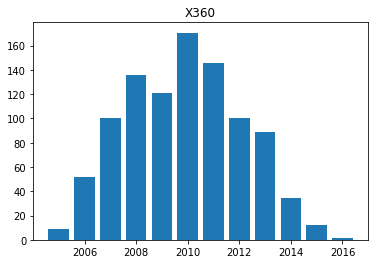

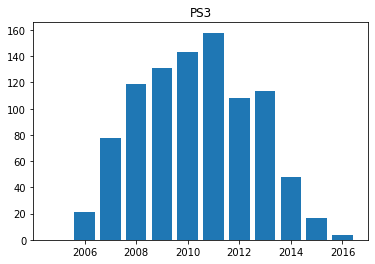

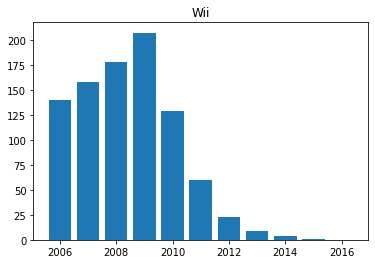

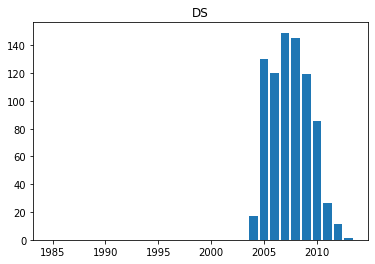

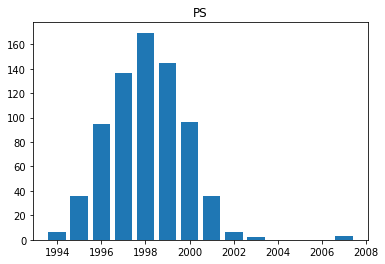

In [48]:
# Con esta información, graficaremos un histograma que tome cada año de las ventas totales por plataforma por año
for platform in most_popular_platform:
    sales_platform = data[data["platform"] == platform].pivot_table(index="year_of_release", values="total_sales", aggfunc="sum")
    #print(sales_platform)
    plt.bar(sales_platform.index, sales_platform["total_sales"])
    plt.title(platform)
    plt.show()


Las plataformas con más ventas en el rango de años 2007 - 2010, fueron X360, Wii y DS. 
Podemos ver que la plataforma DS, vendió tuvo sus mayores ventas durante el 2005-2010. en donde parece que realizaron su mayores lanzamientos fue durante estos años. 

Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

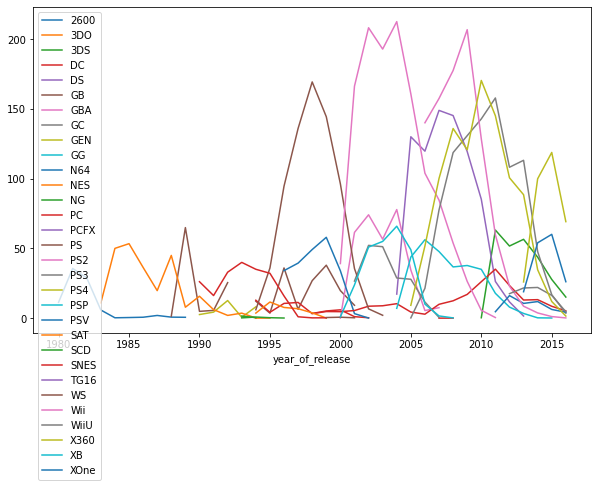

In [49]:
#vemos las ventas por plataformas por año
(
    data
    .pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")
    .plot(figsize=(10,6))
)
plt.legend()
plt.show()

Vemos que la mayoría de las plataformas con mayores ventas, comienza a capitalizar desde el año 2000. Sin embargo, vemos que las plataformas como 2600 que tuvo su lanzamiento en 1980, desapareció cerca de 1986. Lo mismo pasa con la plataforma 3DO que tuvo punto máximo de venta en 1985, para luego desaparecer en 1998. Otro caso parecido es el de plataforma DS y GEN. 

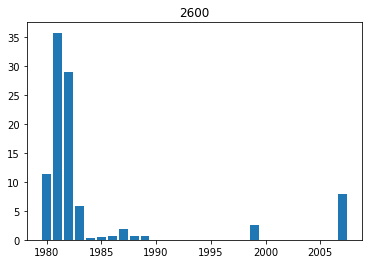

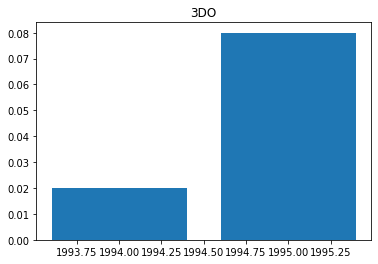

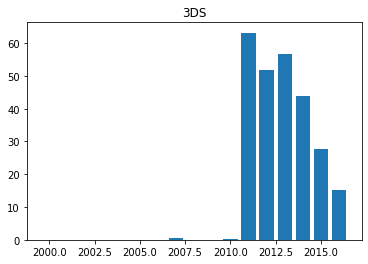

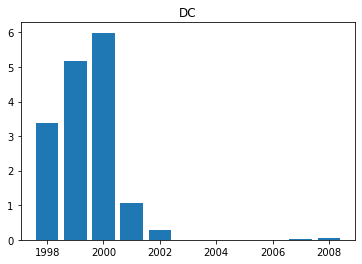

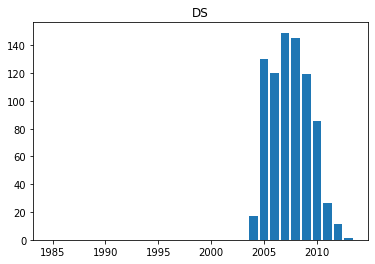

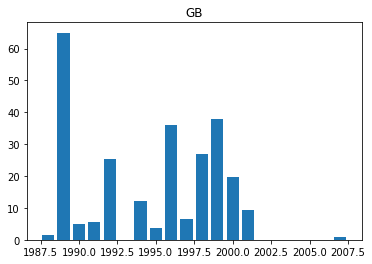

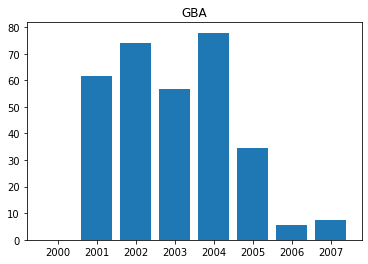

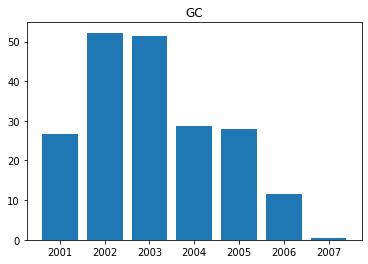

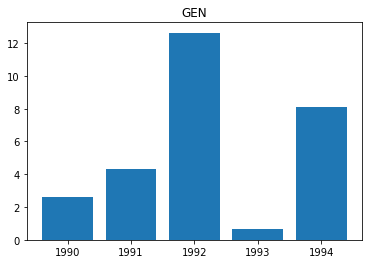

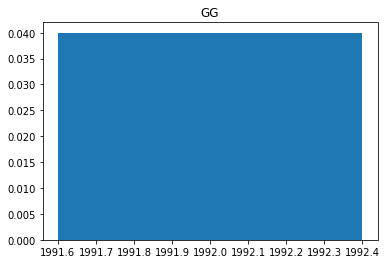

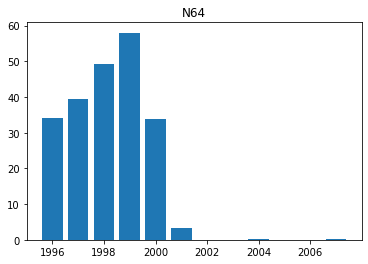

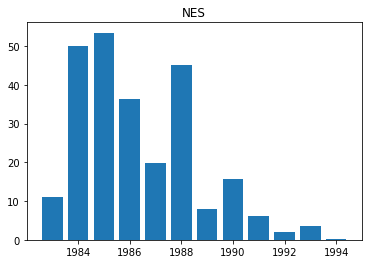

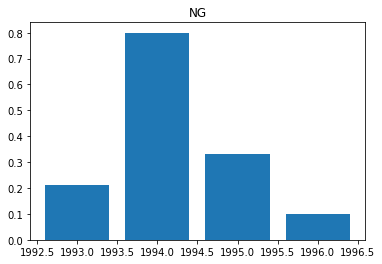

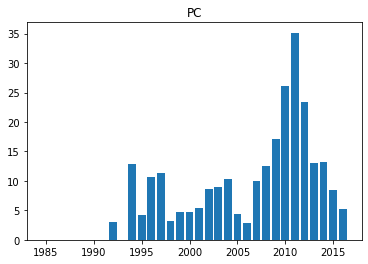

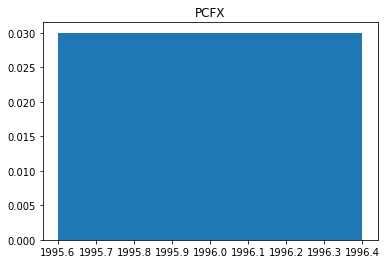

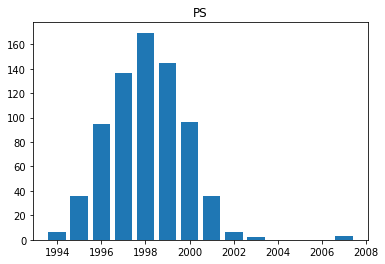

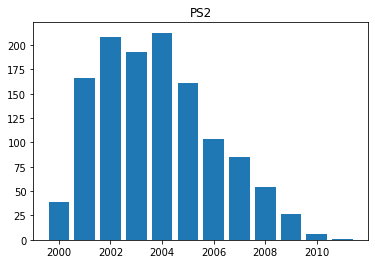

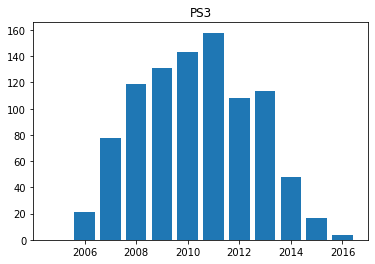

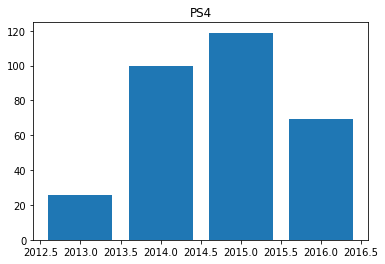

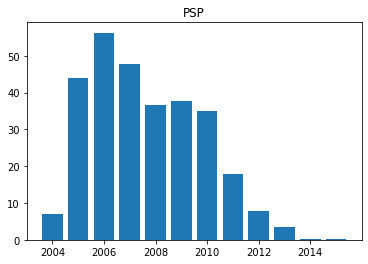

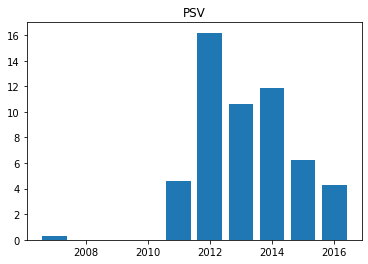

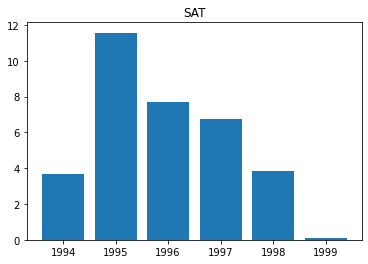

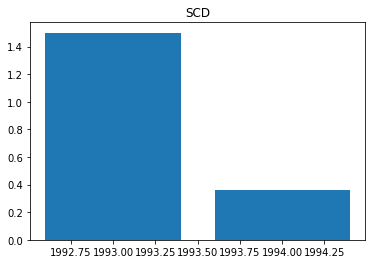

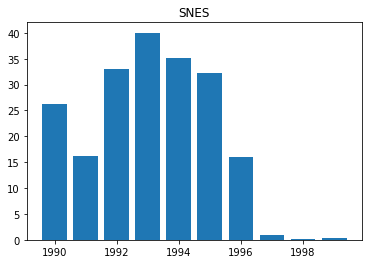

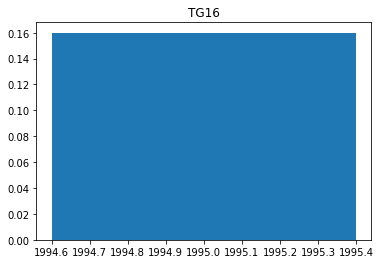

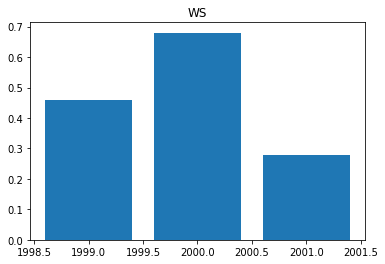

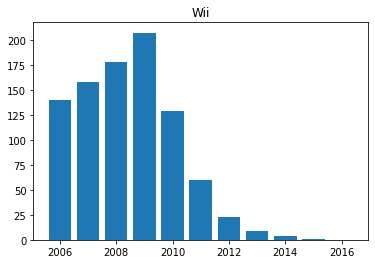

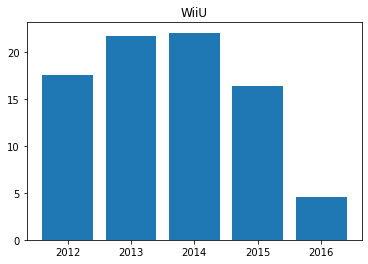

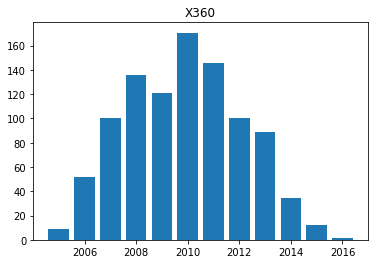

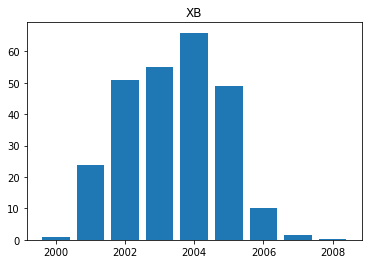

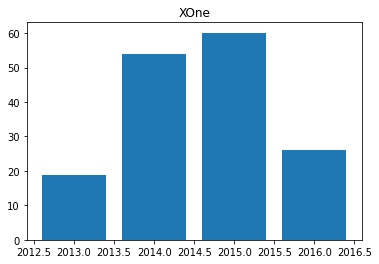

In [50]:
sales_by_platform = data.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")

for platform in sales_by_platform.columns:
    plt.bar(sales_by_platform.index, sales_by_platform[platform])
    plt.title(platform)
    plt.show()


A continuación el análisis por plataforma, según sus ventas totales anuales (Divideremos entre nuevas y viejas, marcando el 2000 como referencia): 

** Las plataformas más antiguas (Lanzadas antes del 2000) **

- 2600: Comenzó sus ventas en 1980 hasta 1988, con ventas bajísimas = 8 años, teniendo un pico de ventas en 1982. 
- 3DO: Comenzó sus ventas en 1993 hasta 1995 = 2años, teniendo un pico de ventas a fines de 1994 hasta 1995, sin tener muchas ventas.
- DC: Lanzó en 1998 hasta 2002 (4 años), con un pico de ventas en 2000. Sin embargo, tiene un residuo de ventas en 2008 (muy bajas)
- GB: Lanza en 1988, hasta 2002 = 14 años. Las ventas más altas las tuvo en 1989, 1 año después de su lanzamiento.
- GEN: lanzado en 1990 hasta 1994 = 4 años
- GG: 1991- 1992= 1 año
- N64: 1996 - 2001 = 5 años
- NES: 1983 -1994 = 11 años
- NG: 1992 -1996 = 4 años
- PC: 1992 - 2016 = 24 años
- PCFX: 1995-1996 = 1 año
- PS: 1994- 2003 = 9 años
- SAT: 1994-1999= 5 años
- SCD: 1992- 1994=  2 años
- SNES: 1990- 1998= 8 años
- TG16: 1994-1995= 1 año
- WS: 1998 - 2001= 3 años

** Las plataformas más nuevas (Lanzadas después del 2000) **

- 3DS: Comenzó sus ventas en 2011 hasta 2016 = 5 años, teniendo un pico de ventas en 2011, año de su lanzamiento, y luego en 2013.
- DS: Lanza en 2004, y marca ventas hasta 2012 = 8 años. 
- GBA: Plataforma lanzada en 2001 hasta 2007 = 6 años, con 2 picos de venta en 2002 y 2004. 
- GC: lanzada en 2001 hasta 2007 = 6 años
- PS2: 2000 - 2010= 10 años
- PS3: 2006- 2016 = 10 años 
- PS4: 2012-2016= 4 años
- PSP: 2004- 201= 4 años
- PSV: 2011- 2016= 5 años
- Wii: 2006-2016= 10 años
- WiiU: 2012-2016= 4 años
- X360: 2005- 2016= 11 años
- XB: 2000-2008 = 8 años
- XOne: 2012- 2016= 4 años



En resumen, para contestar a la pregunta : ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
Viendo la data anterior, las plataformas antiguas tienen una duración promedio de 6 años. Destacando PC, como la plataforma con mayor duración (24 años)
Por otro lado, el año 2000 comenzaron a lanzarse nuevas plataformas que revolucionaron el mercado, como PS2, WII, XB, los que hasta la data tomada (2016), llevan 8 años aprox. 

In [51]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_by_group
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,"(0.6, 82.54]"
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.5,None,40.24,"(0.6, 82.54]"
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,"(0.6, 82.54]"
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,"(0.6, 82.54]"
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,None,31.38,"(0.6, 82.54]"


**Cómo podría crear una columna que tenga la diferencia entre el año de lanzamiento de una plataforma - el último año de vida?, teniendo en cuenta que ambos de encuentran dentro de la misma columna. Seria como restar el máximo - mínimo**

**2.Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017**

<AxesSubplot:xlabel='year_of_release'>

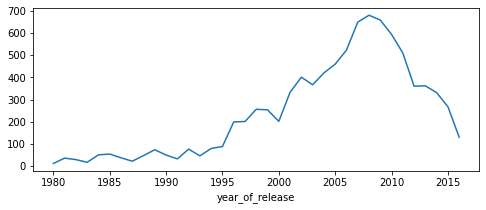

In [52]:
#Ventas totales por periodo de lanzamiento
data.groupby('year_of_release')["total_sales"].sum().plot(kind="line", figsize=(8, 3))

Si analizamos el gráfico anterior, de las ventas totales por año, vemos que el total de ventas totales alcanzadas fueron 600 en 2010. En este caso queremos tomar periodos de tiempo que si nos sean útiles para predecir el 2017. Por lo que viendo la gráfica,  desde 1995 comienzan las ventas más significativas. 

**3.Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.**

In [53]:
#filtramos la data, tomando los valores desde el año 1995
new_data = data[data["year_of_release"] > 1995] 

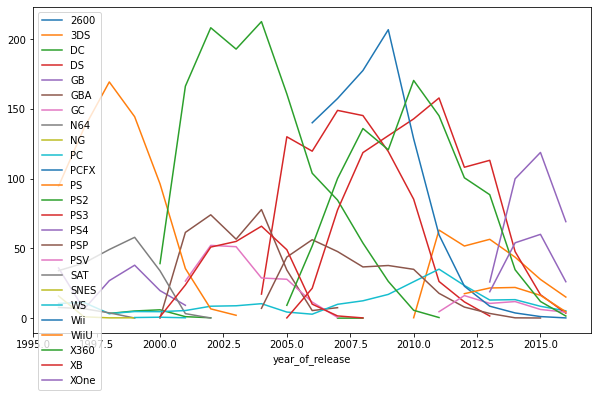

In [54]:
#vemos las ventas por plataformas por año
(
    new_data
    .pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")
    .plot(figsize=(10,6))
)
plt.legend()
plt.show()

**4.¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.**

- Plataforma líder en venta= es la plataforma Wii con 200
- Las plataformas que crecen son = wii, x360 y XB
- Las plataformas que muestran decrecimiento son PS, PS2 que alcanza su pico en 2002, pero que luego cae fuertemente, para ser susituido por PS3 y PS4. De igual forrma, todas se redudcene a partiir de 2015, excepto por XOne que puede tener tendencia a un crecimiento futuro
- Como lo dijimos en el punto anterior, XOne lanzó su plataforma en 2012, teniendo un pico de ventas en 2015, lo que puede darle un gran potencial a futuro. Por otra parte, eligiremos como potenciales de venta futura, las plataformas que más vendieron, como lo fue Wii, PS2, X360 y XB.

**5.Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.**

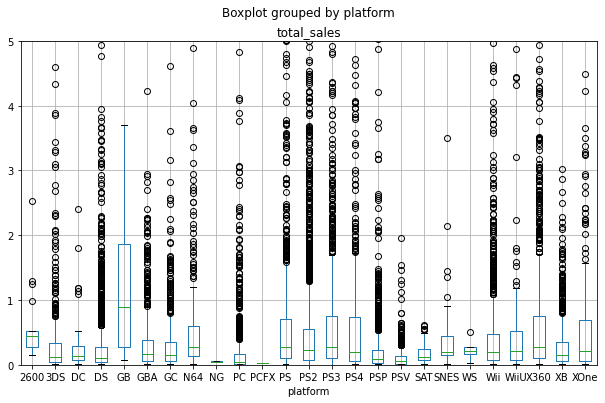

In [55]:
#Crearemos un diagrama de cajas
#En la plataforma wii tenemos el mayor números de valores atípicos, llegando incluso a 70 (que cortamos para tener mayor visibilidad  de los datos)

new_data.boxplot(column="total_sales", by="platform",figsize=(10,6))
plt.ylim(0, 5)  # Establecer límites en el eje vertical
plt.show()

En cuanto a la significación de las diferencias en las ventas, vemos que la plataforma GB cuenta con el boxplot más grande, luego XOne, todas las plataformas de PS y X360. 
En el gráfico anterior no nos dá información sobre los promedios, sin embargo, podemos ver que las medianas de GB es mucho mayor a las otras. Luego aparece la plataforma N65, X360, PS y PS3. 

Lo anterior lo complementaremos con el análisis del orden en que han sido lanzadas las plataformas: 
- Xbox: xbox, xbox 360, xbox one, xbox series X = El lanzamiento de la X360 revolucionó el mercado para la Xbox teniendo las mayores ventas de la categoría, incluso con una mayor mediana y bastantes valores atípicos. Sin embargo, la XOne no se queda atrás, siendo la segunda con mayores ventas.  
- play station: PS1, PS2, PS3, PS4 = En estas ventas van evolucionando positivamente a medida que lanzan nuevas versiones de las plataformas
- nintendo: NES, SNES, N64, GameCube, Wii, Wii U, Switch: La Wii cuenta con mayores ventas atípicas, pero es la WiiU que tiene una mayor media. 

En resumen, se da que a medida que evoluciona la plataforma crecen sus ventas, pero no siempre pasa. 


**6.Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.**

Correlation: 0.0498


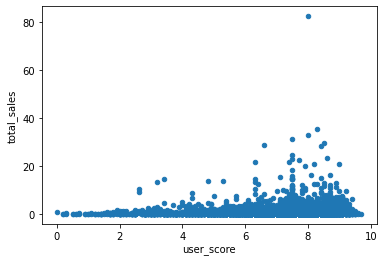

In [56]:
print(f"Correlation: {round(new_data[['user_score', 'total_sales']].corr().iloc[0, 1], 4)}")
new_data.plot(kind="scatter", x="user_score", y="total_sales")
plt.show()

Referencia: Un coeficiente de correlación de 0.0498 en Python indica una correlación extremadamente débil entre las variables que se están analizando. El coeficiente de correlación es un número que varía entre -1 y 1, y se utiliza para medir la relación lineal entre dos variables.

En este caso, un valor de 0.0498 sugiere que hay una correlación positiva muy débil entre las variables. Sin embargo, debido a que el coeficiente está muy cerca de cero, se puede decir que la relación lineal entre las variables es prácticamente inexistente. En otras palabras, no hay una relación lineal significativa entre las variables analizadas.
Por lo tanto, podemos ver que a un aumento del rating no siempre equivale a un aumento en las vetnas. 
Inclusive podemos ver que la plataforma que cuenta con una de las mayores ventas (70), es la plataforma Wii con un score de 8 puntos. 

**Comentarios** :

En realidad la correlación es más significativa. El problema aquí son los valores extremos. Si usted quita valores extremos, verá que la correlación es mucho más alta.

Igualmente, si usted no mezcla los datos de distintas plataformas, verá que la correlación es más alta en lo individual.

Piense por ejemplo en el caso de una plataforma, la que usted quiera. Habrá un periodo donde las ventas se correlacionan positivamente en el tiempo cierto? Y también habrá un periodo de declive y por tanto una correlación negativa. Si usted calcula la correlación de las ventas para todo los periodos (auge y declive) es probable que obtenga que la correlación es baja, aunque era fuertemente positiva en el auge y fuertemente negativa en el declive.

Si tiene una parábola invertida con las ventas en el eje Y y el tiempo en el eje X, es decir, una relación no lineal, el coeficiente de correlación de Pearson no capturará adecuadamente esa relación. En ese caso, es posible que el coeficiente de correlación de Pearson sea cercano a 0, lo que indica una correlación débil o inexistente.

El coeficiente de correlación de Pearson se basa en la covarianza y en la normalización de las desviaciones estándar, lo cual está diseñado para medir la relación lineal entre las variables. Al ser una parábola invertida, la relación entre las ventas y el tiempo no sigue una relación lineal, por lo que el coeficiente de correlación de Pearson no será capaz de capturarla adecuadamente.

El mensaje de valor aquí es que, cuando hay mucha heterogeneidad en los datos (i.e. distintos subconjuntos de datos que se mueven de forma distinta), las correlaciones se pierden en lo agregado.

**7.Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.**

In [58]:
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_by_group
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,"(0.6, 82.54]"
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,"(0.6, 82.54]"
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,"(0.6, 82.54]"
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,None,31.38,"(0.6, 82.54]"
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,"(0.6, 82.54]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,7.5,None,0.01,"(-0.001, 0.05]"
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,7.5,None,0.01,"(-0.001, 0.05]"
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,7.5,None,0.01,"(-0.001, 0.05]"
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,7.5,None,0.01,"(-0.001, 0.05]"


In [59]:
#sacamos el número de juegos únicos por plataformas, sumado al query veremos que más videojuegos salen en más plataformas. 
cross_platform_games = new_data.groupby(["name"])["platform"].nunique()
cross_platform_games = cross_platform_games[cross_platform_games > 1]

In [60]:
cross_platform_games_top10 = cross_platform_games.sort_values(ascending=False).head(10)
cross_platform_games

name
 Frozen: Olaf's Quest               2
007: Quantum of Solace              6
007: The World is not Enough        2
11eyes: CrossOver                   2
18 Wheeler: American Pro Trucker    2
                                   ..
iCarly                              2
iCarly 2: iJoin The Click!          2
nail'd                              2
pro evolution soccer 2011           6
uDraw Studio: Instant Artist        2
Name: platform, Length: 2735, dtype: int64

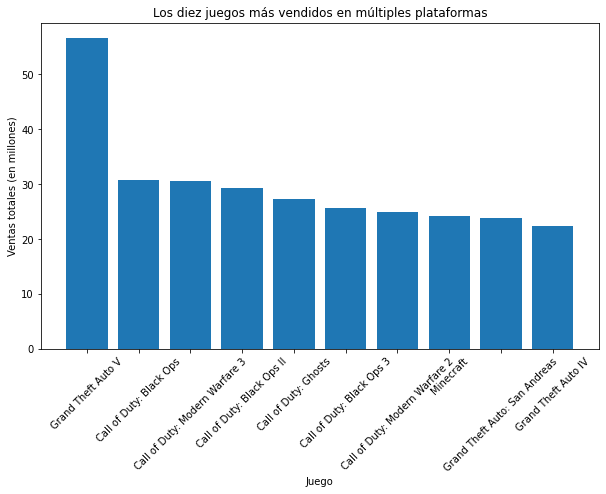

In [62]:
# Filtrar los juegos que estén disponibles en más de una plataforma
filtered_data = new_data.groupby('name').filter(lambda x: len(x) > 1)

# Agrupar los datos por juego y sumar las ventas totales
top_10_games = filtered_data.groupby('name')['total_sales'].sum().nlargest(10)

# Obtener los nombres de los juegos y las ventas totales
game_names = top_10_games.index
sales = top_10_games.values

# Crear un barplot de las ventas de los diez juegos más vendidos en más de una plataforma
plt.figure(figsize=(10, 6))
plt.bar(game_names, sales)
plt.xlabel('Juego')
plt.ylabel('Ventas totales (en millones)')
plt.title('Los diez juegos más vendidos en múltiples plataformas')
plt.xticks(rotation=45)
plt.show()

Aquí podemos ver que de los 10 juegos que se encuentran presentes en más plataformas , se trata de juegos para todo público. En su mayoría èrtenecientes a géneros como deportes, Role-Playing (Call of Duty) , Racing y juegos de niños.

**8.Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**

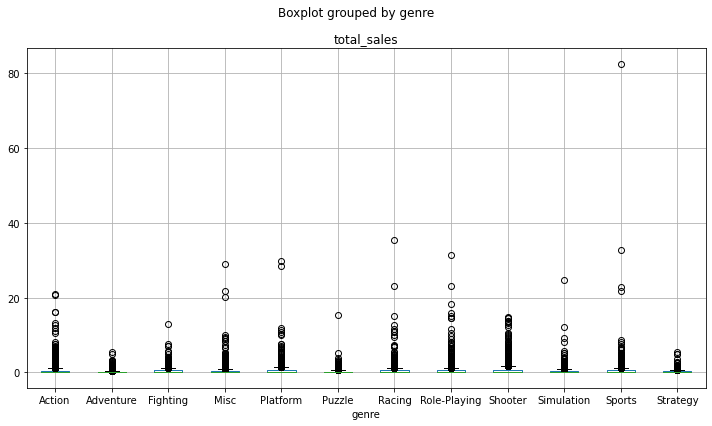

In [63]:
new_data.boxplot(column="total_sales", by="genre",figsize=(10,6))
#plt.ylim(0, 40)
plt.tight_layout()
plt.show()

In [64]:
#Queremos ver cual es el juego que tiene las ventas más altas y pertenede al género sports
new_data.loc[(new_data["total_sales"] > 70) & (new_data["genre"] == "Sports")]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_by_group
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,"(0.6, 82.54]"


Aquí podemos ver que los géneros más rentables con el de Sports, Role-Playing, Racing y Fighting. Lo cuál es consistente con la lista de los juegos que se encuentran disponibles en más plataformas. 
El valor atípico que muestra la venta más alta, pertenece al juego Wii Sports, de la plataforma Wii. 
Debido a que los boxplot, no tienen una diferencia significativa uno del otro, y no cuentan en si mismo con una gran separación, no podemos generalizar. Por lo tanto, un juego de deporte no siempre obtendrá las mayores ventas, al igual que para los otros géneros.  

# Crea un perfil de usuario para cada región
Para cada región (NA, UE, JP) determina:

**1.Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.**

In [65]:
#Primero sacamos las 5 plataformas principales por región.
#comenzamos con hacer una lista de las regiones
regions = ["na_sales", "eu_sales", "jp_sales"]

for region in regions:
    sales_by_regions = new_data.groupby("platform")[region].sum().sort_values(ascending=False).head(5)
    
    print(f"Region: {region}")
    print(sales_by_regions)
    print()



Region: na_sales
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Region: eu_sales
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      202.56
Name: eu_sales, dtype: float64

Region: jp_sales
platform
DS     175.55
PS2    139.20
PS     127.61
3DS    100.67
PS3     80.19
Name: jp_sales, dtype: float64



In [66]:
regions = ["na_sales", "eu_sales", "jp_sales"]
platform_sales = new_data.groupby("platform").agg({"total_sales":"sum"})

for region in regions:
    sales_by_regions = new_data.groupby("platform").agg({region:"sum"})
    sales_by_regions["market_share"] = 100* sales_by_regions[region] / platform_sales["total_sales"]
    
    print(f"Region: {region}")
    print(sales_by_regions.sort_values(by=region , ascending=False).head(5))
    print()



Region: na_sales
          na_sales  market_share
platform                        
X360        602.47     62.019518
PS2         583.84     46.492590
Wii         496.90     54.754218
PS3         393.49     41.876231
DS          382.40     47.438283

Region: eu_sales
          eu_sales  market_share
platform                        
PS2         339.29     27.018483
PS3         330.29     35.150322
X360        270.76     27.872599
Wii         262.21     28.893346
PS          202.56     29.404677

Region: jp_sales
          jp_sales  market_share
platform                        
DS          175.55     21.777695
PS2         139.20     11.084832
PS          127.61     18.524540
3DS         100.67     38.868726
PS3          80.19      8.534029



En cuanto a la participación de mercado por región, vemos que la plataforma con mayor market share, es la de X360 (68%) en Norte América. Incluso podemos decir que esta región cuenta con las mayores participaciones de mercado en las 5 plataformas más vendidas. 

- La plataforma con mayor participación en las 3 regiones son: X360 - Wii-PS2 - PS3
- Para el mercado europeo, la plataforma PS3, cuenta con la mayor participación de mercado (41%)
- Paa el mercado Japonés, la plataforma que cuenta con mayores ventas es la de 3DS, haciendo esta su única aparición en este rcado.
- PS2, se presenta como una de las primeras en participación en todos los mercados

**2.Los cinco géneros principales. Explica la diferencia**

In [67]:
for region in regions:
    tmp_agg_data = data.groupby("genre")[region].sum().sort_values(ascending=False).head(5)
  
    print(f"Region: {region}")
    print(tmp_agg_data)
    print()

Region: na_sales
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Region: eu_sales
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Region: jp_sales
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64



En cuando a al comportamiento de ventas en cuanto al género por región: 

- Norte América: El género más consumido es el de acción, luego el de deporte, y en 3er lugar el de shooter.
- Para el mercado auropeo, se vuelven a repetir los mismos 3 top vendidos en NA. La única diferencia se dá en la 4ta plataforma más consumida es el de carreras, en el caso de europa. 
- Japón: a diferencia de los otros mercados, el género role-playing, es el más consumido (Nº1), mientras que los siguientes corresponden a lo consumido en norte américa. 

**3.Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.**

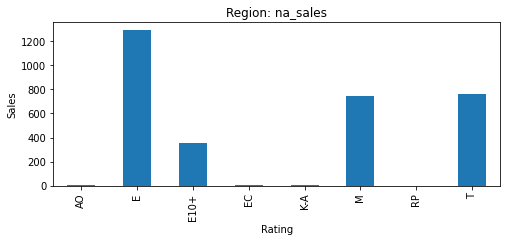

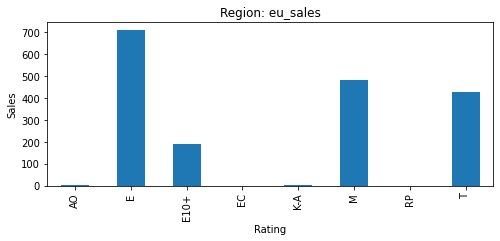

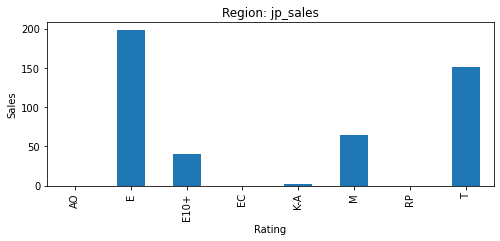

In [68]:
#hacemos un gráfico de barras, utilizando la variable categótica (rating), para cada región 

import matplotlib.pyplot as plt

regions = ["na_sales", "eu_sales", "jp_sales"]

for region in regions:
    tmp_agg_data = data.groupby("rating")[region].sum()

    plt.figure(figsize=(8, 3))
    tmp_agg_data.plot(kind="bar")
    plt.title(f"Region: {region}")
    plt.xlabel("Rating")
    plt.ylabel("Sales")
    plt.show()


- En la región de NA, la clasificación E (everyone), apto para todas las edades, cuenta con las mayores ventas. En segundo lugar se encuentra T (adolecentes), luego tenemos M (maduro +17), y por último E10+. 
- Para la región europea, se repiten los mismos genéros de para NA. En este sentido, en primer lugar se encuentra E, en segundo lugar Maduros, y en tercer lugar Teen. 
- Para japón, las ventas entre en 2do (teen) y 3er lugar (Maduros), se separa mucho más que los otros paises. Incluso, este ese el mercado que mayores ventas presenta del juegos de la clasificación T

# Prueba las siguientes hipótesis:

In [69]:
#Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. Prueba de hipótesis de 2 colas
from scipy import stats as st

#H0: las calificaciones promedio de los usuarios para Xbox One es igual a la las calificaciones promedio de los usuarios de PC
#H1: las calificaciones promedio de los usuarios para Xbox One es diferente a la las calificaciones promedio de los usuarios de PC

alpha = 0.05 #nivel de significancia 

xone_scores = new_data.query('platform == "XOne"')['user_score']
pc_scores = new_data.query('platform == "PC"')['user_score']
results_platform = st.ttest_ind(xone_scores, pc_scores)

print("p-value:", results_platform.pvalue)

if results_platform.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
    
else: 
    print("No rechazamos la hipótesis nula")

p-value: 9.834344880101285e-05
Rechazamos la hipótesis nula


In [70]:
# Hipótesis nula: las varianzas son iguales
levene_result = st.levene(xone_scores, pc_scores)

# Verificar el resultado de la prueba de Levene
if levene_result.pvalue < alpha:
    equal_var = False
    print("Rechazamos la hipótesis de igualdad de varianzas (p-value < alpha)")
else:
    equal_var = True
    print("No rechazamos la hipótesis de igualdad de varianzas (p-value >= alpha)")

# Prueba t con el parámetro equal_var ajustado
results_platform = st.ttest_ind(xone_scores, pc_scores, equal_var=equal_var)

# Verificar el resultado de la prueba t
if results_platform.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

No rechazamos la hipótesis de igualdad de varianzas (p-value >= alpha)
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula, decimos que exite una diferencia significativa entre las calificaciones promedios de los usuarios de PC y XboxOne

In [71]:
#Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
#H0: las calificaciones promedio de los usuarios para los géneros de Acción es igual a la las calificaciones promedio para los géneros de Deporte
#H1: las calificaciones promedio de los usuarios para los géneros de Acción es diferente a la las calificaciones promedio para los géneros de Deporte
action_scores = new_data.query('genre == "XOne"')['user_score']
sports_scores = new_data.query('genre == "Action"')['user_score']
results_genre = st.ttest_ind(action_scores, sports_scores)

print("p-value:", results_genre.pvalue)

if results_genre.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
    
else: 
    print("No rechazamos la hipótesis nula")

p-value: nan
No rechazamos la hipótesis nula


En este caso no rechazamos las hipótesis nula. Es decir, que no hay una diferencia significativa entre los géneros de Acción y Deportes. 

# Conclusiones generales

En general, podemos decir que los géneros más populares son el de acción y deporte, en donde las mayores ventas se encuentran en las 3 regiones. Incluso, podemos ver que el juego con mayores ventas es el de Wii Sports. Las Mayores participanciones de mercado, de la mayoría de las plataformas, se encuentran en Norte América. A excepción de la plataforma 3DS, que cuenta con mayor participación de mercado en Japón. 

En cuento a la clasificación, vemos que entre más apta para todo público mayores ventas. Por lo tanto, la clasificación si afecta a las vetnas. Ya que esta misma clasificación está ligada al género. En este caso Sport y acción, los cuales son los géneros más consunmidos.  